# 신경망 모델
### - 이진 분류: 유방암 예측 사례

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
df.shape

(569, 31)

### 1. 데이터를 정규/표준화 하지 않은 경우

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target,
    test_size = 0.2, random_state = 2022
)

- 모델 정의

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense           # Fully Connected Network

In [42]:
model = Sequential([
                    Dense(100, input_shape=(30, ), activation='relu'),
                    Dense(24, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               3100      
                                                                 
 dense_13 (Dense)            (None, 24)                2424      
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정(컴파일)

In [43]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

- 모델 학습

In [44]:
history = model.fit(X_train, y_train, validation_split=0.2, 
                    epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 98ms/step - loss: 98.7314 - accuracy: 0.3791 - val_loss: 78.2000 - val_accuracy: 0.3516
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 61.5868 - accuracy: 0.3791 - val_loss: 39.3081 - val_accuracy: 0.3516
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 25.5111 - accuracy: 0.3791 - val_loss: 4.5108 - val_accuracy: 0.3516
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 6.1183 - accuracy: 0.5769 - val_loss: 13.7408 - val_accuracy: 0.6484
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 13.9125 - accuracy: 0.6209 - val_loss: 5.9965 - val_accuracy: 0.6593
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 2.7334 - accuracy: 0.7390 - val_loss: 3.4322 - val_accuracy: 0.4286
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 4.7831 - accuracy: 0.4148 - val_loss: 5.2421 - val_accuracy: 0.3626
Epoch 8/100
4

- 모델 평가

In [45]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2217 - accuracy: 0.9035


[0.22165535390377045, 0.9035087823867798]

- 훈련과정 시각화: epoch에 따른 accuracy, val_loss의 변화

In [46]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

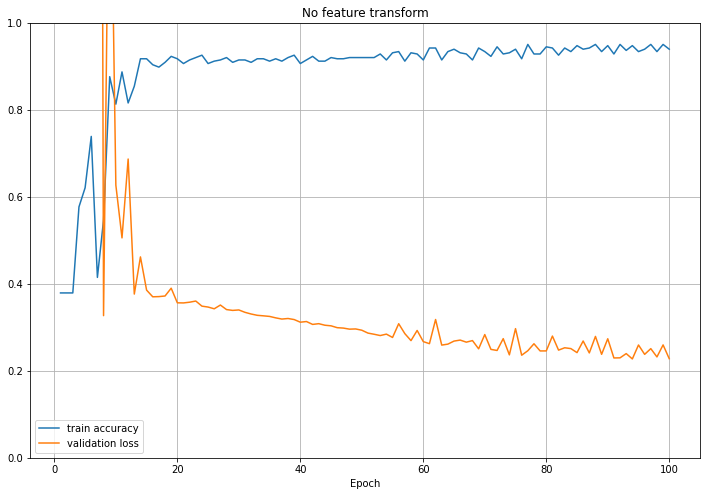

In [48]:
plt.figure(figsize = (12,8))
plt.plot(xs, y_acc, label = 'train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

### 2. 데이터를 정규/표준화한 경우

In [49]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify = cancer.target,
    test_size = 0.2, random_state = 2022
)

- 모델 정의

In [51]:
model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               3100      
                                                                 
 dense_16 (Dense)            (None, 24)                2424      
                                                                 
 dense_17 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [52]:
# model = Sequential([
#                     Dense(100, input_dim=30, activation='relu'),
#                     Dense(24, activation='relu'),
#                     Dense(1, activation='sigmoid')
# ]) 위의 코드와 같음

- 모델 설정

In [53]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델 학습

In [54]:
hist2 = model2.fit(X_train2, y_train2, validation_split = 0.2,
                   epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 95ms/step - loss: 0.7105 - accuracy: 0.4643 - val_loss: 0.6020 - val_accuracy: 0.8022
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 0.5368 - accuracy: 0.8654 - val_loss: 0.4755 - val_accuracy: 0.9011
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.4187 - accuracy: 0.9258 - val_loss: 0.3855 - val_accuracy: 0.9121
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 0.3342 - accuracy: 0.9396 - val_loss: 0.3179 - val_accuracy: 0.9121
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.2703 - accuracy: 0.9396 - val_loss: 0.2696 - val_accuracy: 0.9121
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2224 - accuracy: 0.9505 - val_loss: 0.2357 - val_accuracy: 0.9121
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1882 - accuracy: 0.9505 - val_loss: 0.2127 - val_accuracy: 0.9231
Epoch 8/100
4/4 [===

- 모델 평가

In [55]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9825


[0.044072095304727554, 0.9824561476707458]

- 학습과정 시각화

In [57]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

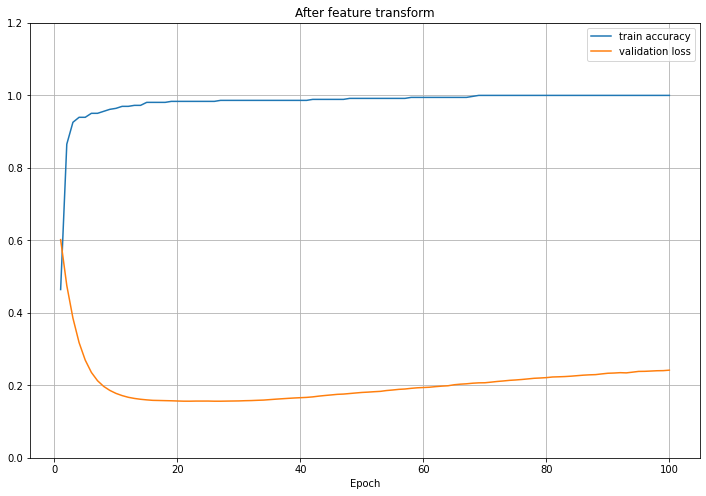

In [60]:
plt.figure(figsize = (12,8))
plt.plot(xs, y_acc2, label = 'train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('After feature transform')
plt.show()